# SCHD Dividend Simulator
## Notation
- `duration`: investment period in month
- `initial_investment`: initial investment amount in KRW
- `extra_monthly_investment`: monthly extra investment amount in KRW
- `stock_price`: current SCHD stock price
- `annual_stock_growth`: annual SCHD stock price growth rate in %/100
- `trade_commision`: stock trade commission fee in %/100
- `dividend_yield`: current SCHD dividend yield in %/100
- `annual_dividend_growth`: SCHD dividend growth rate in %/100
- `dividend_tax`: dividend tax in %/100
- `dividend_frequency`: dividend payment frequency (e.g. 1=monthly, 4=quarterly)
- `reinvest_dividend`: reinvest dividend income if True
- `currency_exchange_rate`: USD to KRW currency
- `currency_exchange_fee`: currency exchange fee

In [1]:
import math

import pandas as pd
import matplotlib.pyplot as plt

from utils.dividend import DividendCalculator

# Examples

## Scenario 1
Initially invest 500 million KRW and simulate stock price growth and dividend yield growth for next 20 years.

In [2]:
# investment period = 20 years
duration = 240

# initial invest amount in KRW
initial_investment = 500_000_000

# extra monthly invest amount in KRW
extra_monthly_investment = 0

# SCHD price in USD
stock_price = 29.35

# SCHD annual stock growth rate = 5%
annual_stock_growth = 0.05

# trade commsion = 0.1%
trade_commission = 0.001

# SCHD dividend yield = 3.5%
dividend_yield = 0.035

# SCHD annual dividend growth rate = 9%
# reference: https://finance.yahoo.com/quote/SCHD/performance/
annual_dividend_growth = 0.09

# dividend tax rate = 15.4%
dividend_tax = 0.154

# dividend frequency in month (e.g. 4 = quarterly)
dividend_frequency = 4

# reinvest dividend income
reinvest_dividend = True

# USD to KRW currency 1 USD = 1400 KRW
currency_exchange_rate = 1400

# currency exchange fee: 0.5%
currency_exchange_fee = 0.005

In [3]:
dividend = DividendCalculator(
    duration=duration,
    initial_investment=initial_investment,
    extra_monthly_investment=extra_monthly_investment,
    stock_price=stock_price,
    annual_stock_growth=annual_stock_growth,
    trade_commission=trade_commission,
    dividend_yield=dividend_yield,
    annual_dividend_growth=annual_dividend_growth,
    dividend_tax=dividend_tax,
    dividend_frequency=dividend_frequency,
    reinvest_dividend=reinvest_dividend,
    currency_exchange_rate=currency_exchange_rate,
    currency_exchange_fee=currency_exchange_fee,
)

In [4]:
result = dividend.simulate()
df = pd.DataFrame(result)

In [5]:
df.head(13)

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
0,0,355001.785714,355001.785714,12095.461183,12095.461183,29.350000,0.035,0.000000,0.000000
1,1,356448.106933,356448.106933,12095.461183,0.000000,29.469576,0.035,0.000000,0.000000
2,2,357900.320643,357900.320643,12095.461183,0.000000,29.589638,0.035,0.000000,0.000000
3,3,359358.450851,362007.807975,12184.634531,89.173348,29.710190,0.035,3131.627806,2649.357124
4,4,360822.521663,363482.672595,12184.634531,0.000000,29.831233,0.035,0.000000,0.000000
5,5,362292.557280,364963.545997,12184.634531,0.000000,29.952769,0.035,0.000000,0.000000
6,6,363768.582004,369152.095309,12274.465306,89.830775,30.074800,0.035,3193.431027,2701.642649
7,7,365250.620236,370656.066640,12274.465306,0.000000,30.197329,0.035,0.000000,0.000000
8,8,366738.696475,372166.165337,12274.465306,0.000000,30.320357,0.035,0.000000,0.000000
9,9,368232.835320,376437.376401,12364.958356,90.493050,30.443886,0.035,3256.453947,2754.960039


In [6]:
df

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
0,0,355001.785714,3.550018e+05,12095.461183,12095.461183,29.350000,0.035000,0.000000,0.000000
1,1,356448.106933,3.564481e+05,12095.461183,0.000000,29.469576,0.035000,0.000000,0.000000
2,2,357900.320643,3.579003e+05,12095.461183,0.000000,29.589638,0.035000,0.000000,0.000000
3,3,359358.450851,3.620078e+05,12184.634531,89.173348,29.710190,0.035000,3131.627806,2649.357124
4,4,360822.521663,3.634827e+05,12184.634531,0.000000,29.831233,0.035000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
236,236,926730.420709,3.822620e+06,49891.910168,0.000000,76.618031,0.179958,0.000000,0.000000
237,237,930506.035157,3.983687e+06,51783.148378,1891.238210,76.930182,0.179958,171977.896581,145493.300507
238,238,934297.031925,3.999917e+06,51783.148378,0.000000,77.243605,0.179958,0.000000,0.000000
239,239,938103.473684,4.016213e+06,51783.148378,0.000000,77.558306,0.179958,0.000000,0.000000


## Scenario2
Invest 1 million KRW per month without initial investment and simulate stock price growth and dividend yield growth for next 20 years.

In [7]:
# investment period = 20 years
duration = 240

# initial invest amount in KRW
initial_investment = 0

# extra monthly invest amount in KRW
extra_monthly_investment = 1_000_000

# SCHD price in USD
stock_price = 29.35

# SCHD annual stock growth rate = 5%
annual_stock_growth = 0.05

# trade commsion = 0.1%
trade_commission = 0.001

# SCHD dividend yield = 3.5%
dividend_yield = 0.035

# SCHD annual dividend growth rate = 9%
# reference: https://finance.yahoo.com/quote/SCHD/performance/
annual_dividend_growth = 0.09

# dividend tax rate = 15.4%
dividend_tax = 0.154

# dividend frequency in month (e.g. 4 = quarterly)
dividend_frequency = 4

# reinvest dividend income
reinvest_dividend = True

# USD to KRW currency 1 USD = 1400 KRW
currency_exchange_rate = 1400

# currency exchange fee: 0.5%
currency_exchange_fee = 0.005

In [8]:
dividend = DividendCalculator(
    duration=duration,
    initial_investment=initial_investment,
    extra_monthly_investment=extra_monthly_investment,
    stock_price=stock_price,
    annual_stock_growth=annual_stock_growth,
    trade_commission=trade_commission,
    dividend_yield=dividend_yield,
    annual_dividend_growth=annual_dividend_growth,
    dividend_tax=dividend_tax,
    dividend_frequency=dividend_frequency,
    reinvest_dividend=reinvest_dividend,
    currency_exchange_rate=currency_exchange_rate,
    currency_exchange_fee=currency_exchange_fee,
)

In [9]:
result = dividend.simulate()
df = pd.DataFrame(result)

In [10]:
df.head(13)

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
0,0,0.000000,0.000000,0.000000,0.000000,29.350000,0.035,0.000000,0.000000
1,1,710.003571,710.003571,24.092765,24.092765,29.469576,0.035,0.000000,0.000000
2,2,1422.899785,1422.899785,48.087772,23.995007,29.589638,0.035,0.000000,0.000000
3,3,2138.700427,2149.233442,72.339943,24.252170,29.710190,0.035,12.450373,10.533016
4,4,2857.417328,2867.993257,96.140620,23.800678,29.831233,0.035,0.000000,0.000000
5,5,3579.062372,3589.681388,119.844725,23.704105,29.952769,0.035,0.000000,0.000000
6,6,4303.647486,4340.882382,144.336199,24.491474,30.074800,0.035,31.409712,26.572616
7,7,5031.184650,5068.571246,167.848330,23.512132,30.197329,0.035,0.000000,0.000000
8,8,5761.685891,5799.224804,191.265059,23.416729,30.320357,0.035,0.000000,0.000000
9,9,6495.163284,6575.783896,215.996867,24.731808,30.443886,0.035,50.743217,42.928762


In [11]:
df

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
0,0,0.000000,0.000000,0.000000,0.000000,29.350000,0.035000,0.000000,0.000000
1,1,710.003571,710.003571,24.092765,24.092765,29.469576,0.035000,0.000000,0.000000
2,2,1422.899785,1422.899785,48.087772,23.995007,29.589638,0.035000,0.000000,0.000000
3,3,2138.700427,2149.233442,72.339943,24.252170,29.710190,0.035000,12.450373,10.533016
4,4,2857.417328,2867.993257,96.140620,23.800678,29.831233,0.035000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
236,236,280663.359954,809995.385226,10571.863749,9.266795,76.618031,0.179958,0.000000,0.000000
237,237,282516.820796,844834.764043,10981.837525,409.973776,76.930182,0.179958,36441.316527,30829.353782
238,238,284377.832866,848986.729019,10991.029271,9.191746,77.243605,0.179958,0.000000,0.000000
239,239,286246.426930,853155.609616,11000.183720,9.154449,77.558306,0.179958,0.000000,0.000000


## Scenario3
Let's compare the pessimistic/normal/optimistic cases.

In [12]:
# investment period = 20 years
duration = 240

# initial invest amount in KRW
initial_investment = 0

# extra monthly invest amount in KRW
extra_monthly_investment = 1_000_000

# SCHD price in USD
stock_price = 29.35

# SCHD annual stock growth rate = 5%
annual_stock_growth = 0.05

# trade commsion = 0.1%
trade_commission = 0.001

# SCHD dividend yield = 3.5%
dividend_yield = 0.035

# SCHD annual dividend growth rate = 9%
# reference: https://finance.yahoo.com/quote/SCHD/performance/
annual_dividend_growth = 0.09

# dividend tax rate = 15.4%
dividend_tax = 0.154

# dividend frequency in month (e.g. 4 = quarterly)
dividend_frequency = 4

# reinvest dividend income
reinvest_dividend = True

# USD to KRW currency 1 USD = 1400 KRW
currency_exchange_rate = 1400

# currency exchange fee: 0.5%
currency_exchange_fee = 0.005

In [13]:
dividend = DividendCalculator(
    duration=duration,
    initial_investment=initial_investment,
    extra_monthly_investment=extra_monthly_investment,
    stock_price=stock_price,
    annual_stock_growth=annual_stock_growth,
    trade_commission=trade_commission,
    dividend_yield=dividend_yield,
    annual_dividend_growth=annual_dividend_growth,
    dividend_tax=dividend_tax,
    dividend_frequency=dividend_frequency,
    reinvest_dividend=reinvest_dividend,
    currency_exchange_rate=currency_exchange_rate,
    currency_exchange_fee=currency_exchange_fee,
)

In [14]:
stock_growth_rate_list = [0.03, 0.05]
dividend_growth_rate_list = [0.05, 0.07, 0.09]

df_result = []
for stock_growth_rate in stock_growth_rate_list:
    dividend._r_stock = stock_growth_rate
    _df_result = []
    for dividend_growth_rate in dividend_growth_rate_list:
        dividend._r_divd = dividend_growth_rate
        _df_result.append(pd.DataFrame(dividend.simulate()))
    df_result.append(_df_result)

In [15]:
# stock growth rate: low & dividend growth rate: low
df_result[0][0].tail()

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
236,236,226969.911493,419307.377584,7988.384843,13.526549,52.489632,0.088443,0.000000,0.000000
237,237,228239.684097,428894.964751,8150.939209,162.554366,52.619085,0.088443,9271.227522,7843.458484
238,238,229512.588302,430662.739009,8164.399284,13.460075,52.748858,0.088443,0.000000,0.000000
239,239,230788.631832,432434.873076,8177.826244,13.426960,52.878951,0.088443,0.000000,0.000000
240,240,232067.822430,442300.395820,8343.816192,165.989948,53.009365,0.088443,9561.487136,8089.018117


In [16]:
# stock growth rate: high & dividend growth rate: low
df_result[1][0].tail()

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
236,236,280663.359954,531465.832780,6936.563435,9.266795,76.618031,0.088443,0.000000,0.000000
237,237,282516.820796,544282.560316,7075.019755,138.456320,76.930182,0.088443,11751.142287,9941.466375
238,238,284377.832866,547210.038412,7084.211500,9.191746,77.243605,0.088443,0.000000,0.000000
239,239,286246.426930,550149.443416,7093.365950,9.154449,77.558306,0.088443,0.000000,0.000000
240,240,288122.633877,563391.781222,7234.631587,141.265637,77.874288,0.088443,12164.252131,10290.957303


In [17]:
# stock growth rate: high & dividend growth rate: normal
df_result[1][1].tail()

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
236,236,280663.359954,638513.385754,8333.722191,9.266795,76.618031,0.126578,0.000000,0.000000
237,237,282516.820796,658918.634083,8565.151068,231.428877,76.930182,0.126578,20205.510859,17093.862187
238,238,284377.832866,662313.153733,8574.342814,9.191746,77.243605,0.126578,0.000000,0.000000
239,239,286246.426930,665721.503077,8583.497263,9.154449,77.558306,0.126578,0.000000,0.000000
240,240,288122.633877,686965.998542,8821.473933,237.976670,77.874288,0.126578,21066.501282,17822.260085


In [18]:
# stock growth rate: high & dividend growth rate: high
df_result[1][2].tail()

,month,investment,total_investment,num_stock,stock_bought,stock_price,dividend_yield,dividend_income,dividend_income_after_tax
236,236,280663.359954,809995.385226,10571.863749,9.266795,76.618031,0.179958,0.000000,0.000000
237,237,282516.820796,844834.764043,10981.837525,409.973776,76.930182,0.179958,36441.316527,30829.353782
238,238,284377.832866,848986.729019,10991.029271,9.191746,77.243605,0.179958,0.000000,0.000000
239,239,286246.426930,853155.609616,11000.183720,9.154449,77.558306,0.179958,0.000000,0.000000
240,240,288122.633877,889813.556193,11426.281807,426.098087,77.874288,0.179958,38383.074995,32472.081446


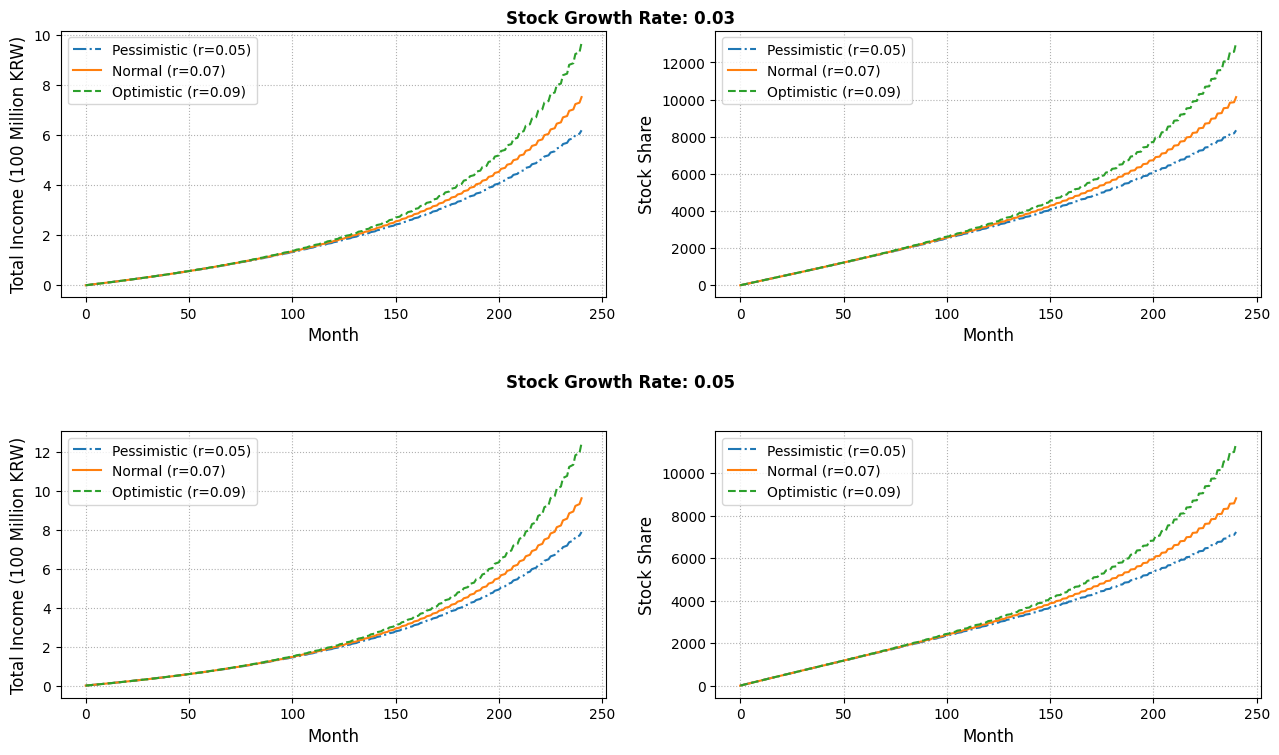

In [19]:
scenarios = ["Pessimistic", "Normal", "Optimistic"]
scenarios = [f"{scenarios[i]} (r={dividend_growth_rate_list[i]})" for i in range(len(scenarios))]
ltys = ["-.", "-", "--"]
cols = ["total_investment", "num_stock"]
ylabels = ["Total Income (100 Million KRW)", "Stock Share"]

fig, axs = plt.subplots(2, 2)
for i in range(len(stock_growth_rate_list)):
    df_list = df_result[i]
    for j in range(len(cols)):
        ax = axs[i, j]
        col = cols[j]
        for k in range(len(dividend_growth_rate_list)):
            cur = df_list[k]            
            x = cur.month
            y = cur[col]
            # KRW in 100 Million
            if j == 0:
                y = y * 1400 / 10**8
            ax.plot(x, y, linestyle=ltys[k], label=scenarios[k])
        ax.legend()
        ax.grid(linestyle=":")
        ax.set_xlabel("Month", fontsize=12)
        ax.set_ylabel(ylabels[j], fontsize=12)
    axs[i]


right = 2
top = 1.5
fig.text(right/2, top*1.01, f"Stock Growth Rate: {stock_growth_rate_list[0]}", ha="center", fontsize=12, fontweight="bold")
fig.text(right/2, top/2*1.01, f"Stock Growth Rate: {stock_growth_rate_list[1]}", ha="center", fontsize=12, fontweight="bold")
fig.subplots_adjust(right=right, top=top, hspace=0.5)